In [26]:
import cptac
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
# Download Cancers
ccrcc = cptac.Ccrcc()
luad = cptac.Luad()
hnscc  = cptac.Hnscc()
lscc = cptac.Lscc()

cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (<ipython-input-2-93a45170b342>, line 5)


In [3]:
def get_tumor_normal_df(cancer_type, gene):
    tumor = cancer_type.multi_join({'proteomics': gene, 'transcriptomics': gene}, tissue_type= 'tumor', flatten = True)
    normal = cancer_type.multi_join({'proteomics': gene, 'transcriptomics': gene}, tissue_type= 'normal', flatten = True)
    tumor = tumor.dropna()
    normal = normal.dropna()
    cutoff = 15
    if len(normal) < cutoff or len(tumor) < cutoff:
        return float("NaN")
    tumor.columns = ['proteomics', 'transcriptomics']
    normal.columns = ['proteomics', 'transcriptomics']
    groups = ['Tumor'] * len(tumor)
    groups.extend(['Normal']*len(normal))
    prot_list = list(tumor['proteomics'])
    prot_list.extend(list(normal['proteomics']))
    trans_list = list(tumor['transcriptomics'])
    trans_list.extend(list(normal['transcriptomics']))
    gene_df = pd.DataFrame({'Tissue': groups, 'Protein Abundance': prot_list, 'RNA Abundance': trans_list})
    return gene_df

In [4]:
def get_cancer_string(cancer):
    if cancer == ccrcc:
        return "CCRCC"
    if cancer == luad:
        return 'LUAD'
    if cancer == hnscc:
        return 'HNSCC'
    if cancer == lscc:
        return 'LSCC'

In [5]:
cancer_genes = ['RAB5A']
cancer_list = [ccrcc, luad, hnscc, lscc]

In [6]:
# Make df for grid plot
dfs = []
for cancer in cancer_list:
    for gene in cancer_genes:
        gene_df = get_tumor_normal_df(cancer, gene)
        gene_df['Cancer'] = [get_cancer_string(cancer)] * len(gene_df)
        gene_df['Gene'] = [gene] * len(gene_df)
        dfs.append(gene_df)
df = pd.concat(dfs)

cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\nanel\anaconda3\lib\site-packages\cptac\dataset.py, line 729)
cptac warning: You tried to flatten a column index that didn't have multiple levels, so we didn't actually change anything. (C:\Users\nanel\anaconda3\lib\site-packages\cptac\dataset.py, line 729)


In [7]:
df

,Tissue,Protein Abundance,RNA Abundance,Cancer,Gene
0,Tumor,-0.239314,20.450882,CCRCC,RAB5A
1,Tumor,-0.368525,17.318228,CCRCC,RAB5A
2,Tumor,-0.085804,24.897179,CCRCC,RAB5A
3,Tumor,-0.057130,19.153379,CCRCC,RAB5A
4,Tumor,0.051858,34.939300,CCRCC,RAB5A
...,...,...,...,...,...
197,Normal,0.571600,18.551900,LSCC,RAB5A
198,Normal,0.814300,18.455600,LSCC,RAB5A
199,Normal,0.558200,18.407200,LSCC,RAB5A
200,Normal,0.515200,18.259600,LSCC,RAB5A


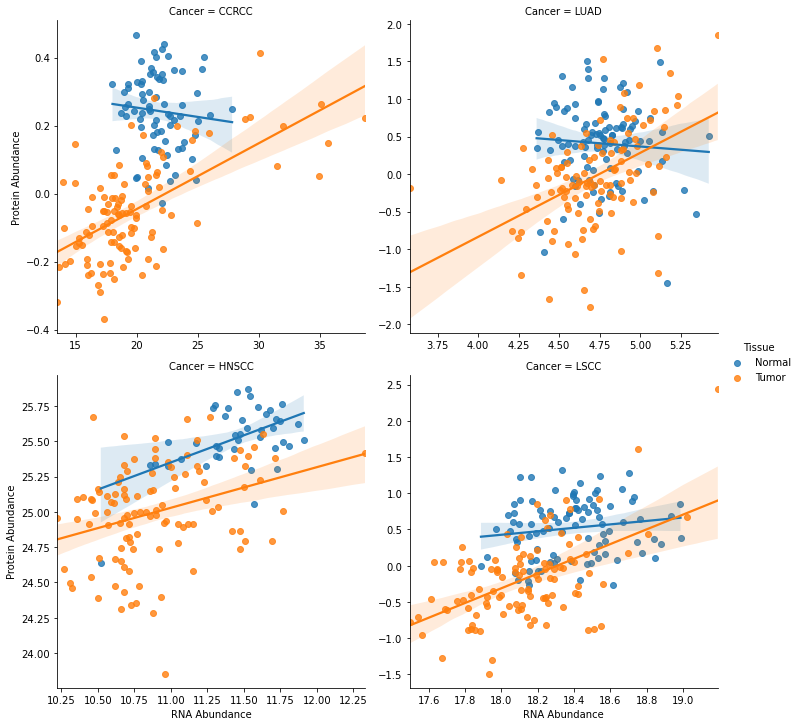

In [8]:
# Make grid plot of all

g = sns.lmplot(data = df, y = 'Protein Abundance', 
               x = 'RNA Abundance', hue = 'Tissue', 
               col = 'Cancer',sharex = False, 
               sharey = False, hue_order = ['Normal', 'Tumor'],
               legend=True, legend_out=True, col_wrap = 2)
g.savefig('Figures/Figure 2) Rab5a Tumor vs Normal Plots.png')

CCRCC
LUAD
HNSCC
LSCC


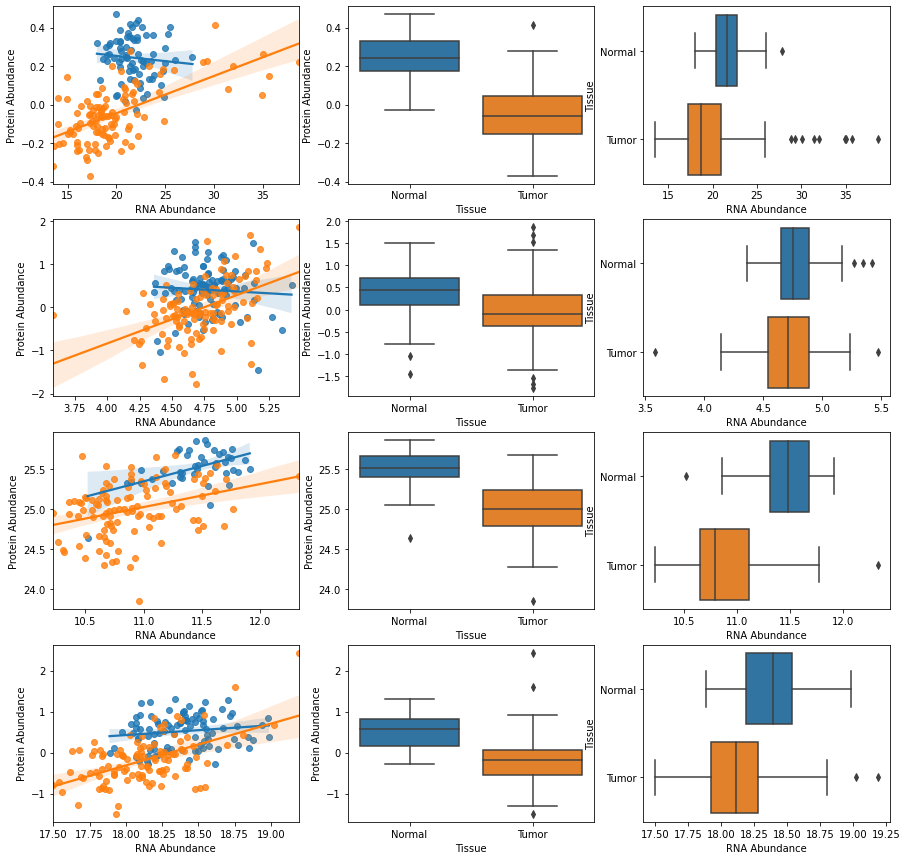

In [30]:
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize=(15,15))
ccrcc_df = df[df.Cancer == 'CCRCC']
i = 0
for cancer in pd.unique(df.Cancer):
    print(cancer)
    cancer_df = df[df.Cancer == cancer]
    plt.sca(ax[i][0])
    sns.regplot(data = cancer_df[cancer_df.Tissue == 'Normal'], y = 'Protein Abundance', 
                   x = 'RNA Abundance')
    sns.regplot(data = cancer_df[cancer_df.Tissue == 'Tumor'], y = 'Protein Abundance', 
                   x = 'RNA Abundance')
    plt.sca(ax[i][1])
    sns.boxplot(data = cancer_df, x = 'Tissue', y = 'Protein Abundance', order = ['Normal', 'Tumor'])
    plt.sca(ax[i][2])
    sns.boxplot(data = cancer_df, y = 'Tissue', x = 'RNA Abundance', order = ['Normal', 'Tumor'])
    i += 1

In [28]:
diff_df = pd.read_csv('data/Proteomics_differential_expression_df.csv')
diff_df

,Gene,statistic,pval,FDR,Cancer,Log2_fold_change
0,A1BG,4.062020,4.864990e-05,7.977389e-05,CCRCC,0.846625
1,A1CF,-6.998855,2.580621e-12,6.376757e-12,CCRCC,-0.218309
2,A2M,6.557556,5.469684e-11,1.261222e-10,CCRCC,-1.256118
3,A4GALT,0.979796,3.271869e-01,3.660405e-01,CCRCC,3.045874
4,AAAS,9.324065,1.119664e-20,4.340440e-20,CCRCC,4.527650
...,...,...,...,...,...,...
55360,ZXDC,9.587427,9.030866e-22,3.677112e-21,LSCC,-2.914588
55361,ZYG11B,-9.284609,1.623017e-20,6.101665e-20,LSCC,-1.544463
55362,ZYX,-11.867668,1.742578e-32,2.798182e-31,LSCC,-0.724833
55363,ZZEF1,-10.255579,1.117044e-24,5.770876e-24,LSCC,-1.760497


In [29]:
diff_df[diff_df.Gene == 'RAB5A']

,Gene,statistic,pval,FDR,Cancer,Log2_fold_change
7767,RAB5A,-10.392474,2.683008e-25,1.418162e-24,CCRCC,-2.348039
18847,RAB5A,7.330295,2.296460e-13,2.065311e-12,Endometrial,-2.073625
29382,RAB5A,-5.462369,4.698224e-08,9.120602e-08,LUAD,-3.570662
40683,RAB5A,-7.755324,8.811843e-15,7.582584e-14,HNSCC,-0.026051
51941,RAB5A,-9.031414,1.694681e-19,5.928454e-19,LSCC,-1.506754
